# Cohort 107 AUCs analysis 

### Imports and environment setup

- Date of run: 2024-10-04
- Environment: python 3.12
- Packages required: pandas, numpy, sklearn, statsmodels, seaborn, matplotlib

In [1]:
# Include in the environment the code directory with the utils function
import sys
sys.path.append('../code/')

In [2]:
# Library imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Utils imports
import cohort_analysis_utils as utils
import ms_utils

In [3]:
# Remove warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Remove cell printing limits
pd.set_option('display.max_rows', None)

# Data loading and preprosessing

For this analysis, we are going to work with the MS matrix ─located at ["data/ms/MS_verification_107.csv"](<../data/ms/MS_verification_107.csv>)─. For this dataset so far we have no metadata, just values for peptides and pathology condition for the 107 samples.

In [4]:
MS_107_PATH = "../data/ms/MS_validation_107_9_hyperplasias.csv"

In [5]:
df_107 = pd.read_csv(MS_107_PATH, sep="\t", header=[0,1], index_col=0)

In [6]:
# Combine the names of headers at level 0 and 1 and make them the new headers
df_107.columns = ["_".join(filter(lambda x: x != '', col)).strip() for col in df_107.columns.values]


In [7]:
# Rename the column 0 to "Pathology" and make it categorical
df_107 = df_107.rename(columns={df_107.columns[0]: "Pathology"})
df_107['Pathology'] = df_107['Pathology'].apply(lambda x: 1 if x.startswith("T") else 0)

# Computing the models

In [8]:
# General parames
RESULTS_PATH = '../data/results/107'
BIOMARKERS_107 = df_107.columns[1:]
METHODS = ['direct']

In [9]:
# This is costly, so is commented out to compute it only once

models_107 = utils.compute_all_models_and_save(df=df_107, 
                                              biomarkers=BIOMARKERS_107, 
                                              target_col='Pathology', 
                                              methods=METHODS, 
                                              max_biomarker_count=1,
                                              folder_name=RESULTS_PATH,
                                              auc_threshold=0.0, 
                                              plot_rocs=True, 
                                              compute_auc_ci=True)

In [10]:
# Load the results
df_107_results_direct_max_1 = pd.read_csv(f'{RESULTS_PATH}/direct/max_1.csv', sep=',', index_col=0, header=0)
df_107_results_direct_max_1.head(10)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
MMP9_SLGPALLLLQK,0.89340,0.85507,0.81579,0.75610,0.89394,0.64646
MMP9_AFALWSAVTPLTFTR,0.89321,0.86957,0.81579,0.77500,0.89552,0.61616
LDHA_VTLTSEEEAR,0.88787,0.82609,0.78947,0.71429,0.87692,0.71717
LDHA_LVIITAGAR,0.88406,0.75362,0.86842,0.66000,0.91228,0.75758
KPYM_NTGIICTIGPASR,0.87948,0.68116,0.97368,0.62712,0.97917,0.74747
CADH1_NLVQIK,0.87147,0.71014,0.94737,0.64286,0.96078,0.73737
SPIT1_SFVYGGCLGNK,0.87109,0.82609,0.86842,0.73333,0.91935,0.70707
SPIT1_WYYDPTEQICK,0.86270,0.85507,0.84211,0.76190,0.90769,0.68687
PERM_IANVFTNAFR,0.86194,0.92754,0.73684,0.84848,0.86486,0.55556


In [11]:
roc_csv_path = f"{RESULTS_PATH}/direct/max_1/rocs/MMP9_SLGPALLLLQK.csv"
roc_df = pd.read_csv(roc_csv_path, sep=',', index_col=0, header=0)
roc_df.tail(10)

,Sensitivity,Specificity,NPV,PPV
Threshold,,,,
0.585622,0.898551,0.684211,0.787879,0.837838
0.568189,0.927536,0.684211,0.838710,0.842105
0.567108,0.927536,0.657895,0.833333,0.831169
0.561110,0.942029,0.657895,0.862069,0.833333
0.551995,0.942029,0.552632,0.840000,0.792683
0.550117,0.956522,0.552632,0.875000,0.795181
0.540835,0.956522,0.500000,0.863636,0.776471
0.538415,0.956522,0.447368,0.850000,0.758621
0.505249,0.956522,0.184211,0.700000,0.680412


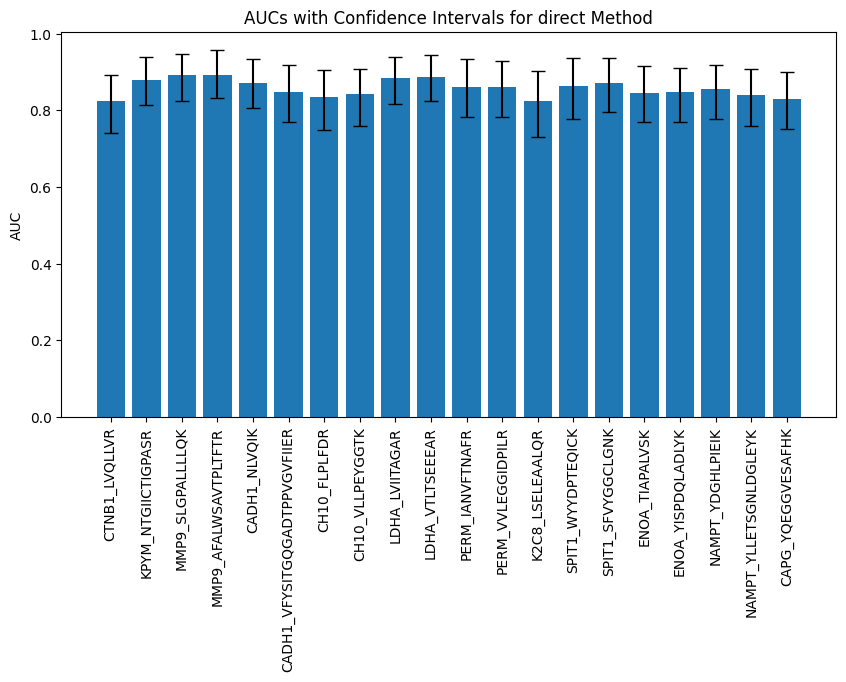

In [12]:
BIOMARKERS_107_cis = df_107_results_direct_max_1.head(20).index
utils.plot_aucs_with_confidence_intervals(models_107, 'direct', BIOMARKERS_107_cis)

In [13]:
BIOMARKERS_107_cis = df_107_results_direct_max_1.head(30).index
BIOMARKERS_high = []
for bmk in BIOMARKERS_107_cis:
    prot = bmk.split('_')[0]
    pep = bmk.split('_')[1]
    if prot not in  [p.split("_")[0] for p in BIOMARKERS_high]:
        BIOMARKERS_high.append(bmk)

In [14]:
_ = utils.compute_all_models_and_save(df=df_107, 
                                        biomarkers=BIOMARKERS_high, 
                                        target_col='Pathology', 
                                        methods=METHODS, 
                                        max_biomarker_count=3,
                                        folder_name=RESULTS_PATH,
                                        auc_threshold=0.5, 
                                        plot_rocs=True)

In [15]:
df_107_results_direct_max_3 = pd.read_csv(f'{RESULTS_PATH}/direct/max_3.csv', sep=',', index_col=0, header=0)
df_107_results_direct_max_3.head(10)

,Biomarker_2,Biomarker_3,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,,,
KPYM_NTGIICTIGPASR,PERM_IANVFTNAFR,MIF_LLCGLLAER,0.94088,0.89855,0.89474,0.82927,0.93939,0.56566
MMP9_SLGPALLLLQK,KPYM_NTGIICTIGPASR,MIF_LLCGLLAER,0.94050,0.84058,0.94737,0.76596,0.96667,0.68687
MMP9_SLGPALLLLQK,PERM_IANVFTNAFR,CTNB1_LVQLLVR,0.93516,0.76812,0.97368,0.69811,0.98148,0.79798
MMP9_SLGPALLLLQK,CAPG_YQEGGVESAFHK,CTNB1_LVQLLVR,0.93478,0.76812,0.97368,0.69811,0.98148,0.77778
MMP9_SLGPALLLLQK,CTNB1_LVQLLVR,NaN,0.93402,0.78261,0.97368,0.71154,0.98182,0.77778
MMP9_SLGPALLLLQK,CH10_VLLPEYGGTK,CTNB1_LVQLLVR,0.93364,0.78261,0.97368,0.71154,0.98182,0.77778
MMP9_SLGPALLLLQK,CH10_VLLPEYGGTK,CAPG_YQEGGVESAFHK,0.92715,0.85507,0.89474,0.77273,0.93651,0.73737
MMP9_SLGPALLLLQK,SPIT1_SFVYGGCLGNK,CH10_VLLPEYGGTK,0.92639,0.85507,0.92105,0.77778,0.95161,0.73737
MMP9_SLGPALLLLQK,SPIT1_SFVYGGCLGNK,CTNB1_LVQLLVR,0.92639,0.76812,0.97368,0.69811,0.98148,0.76768
